<div style="font-size: 14pt;">Prof. Krzysztof Rybinski</div><br/><br/>
<div style="font-size: 22pt;"><b>Artificial Intelligence course</b></div><br/><br/>
<div style="font-size: 18pt;">Homework 4 </div><br/>
<div style="font-size: 18pt;">- Train convolutional neural network on lfw people dataset</div><br/>
<div style="font-size: 18pt;">- Try different hyperparameters (no of layers, no of neurons, number of filters, filter size etc.)</div><br/>
<div style="font-size: 18pt;">- Use dropout regularization after Maxpooling and/or after Dense layer and check if it helps</div><br/>
<div style="font-size: 18pt;">- Use callback - early stopping </div><br/><br/>
<div style="font-size: 18pt;">- Max 2 points. Best accuracy gets 0.2 point bonus</div><br/>


In [1]:
import keras

import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
# Download dataset
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

1288 50 37


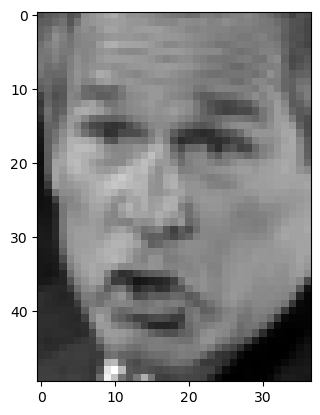

3 George W Bush


In [3]:
plt.imshow( lfw_people.images[6] , cmap='gray')
plt.show()
print( lfw_people.target[6] , lfw_people.target_names[lfw_people.target[6]] )

In [4]:
X = lfw_people.data
y = lfw_people.target

n_features = X.shape[1]
target_names = lfw_people.target_names

In [5]:
y = keras.utils.to_categorical(y)
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [6]:
n_classes = y.shape[1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1234)
X_train = X_train / 255
X_test = X_test / 255
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((966, 1850), (322, 1850), (966, 7), (322, 7))

In [8]:
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Reshape
from keras.models import Sequential


In [9]:
#Use callbacks
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10, monitor="val_loss", verbose=1)


In [10]:
#define the model, do not forget to reshape the input
model = Sequential()
model.add(Reshape((50,37,1), input_shape=(1850,)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'), )
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5) )
model.add(Dense(7, activation='softmax'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 50, 37, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 50, 37, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 18, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 100)               1440100   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                        

In [18]:
#compile the model
model.compile(loss='categorical_crossentropy',)


In [19]:
#train the model, use callbacks
model.fit(X_train, y_train, validation_split=0.5, epochs=75, batch_size=10, callbacks=[early_stopping])

Epoch 1/75
49/49 [==============================] - 3s 40ms/step - loss: 1.9354 - val_loss: 1.6778
Epoch 2/75
49/49 [==============================] - 1s 21ms/step - loss: 1.7635 - val_loss: 1.6548
Epoch 3/75
49/49 [==============================] - 1s 18ms/step - loss: 1.7195 - val_loss: 1.6629
Epoch 4/75
49/49 [==============================] - 1s 25ms/step - loss: 1.6772 - val_loss: 1.5508
Epoch 5/75
49/49 [==============================] - 2s 35ms/step - loss: 1.6008 - val_loss: 1.5262
Epoch 6/75
49/49 [==============================] - 2s 34ms/step - loss: 1.4721 - val_loss: 1.3662
Epoch 7/75
49/49 [==============================] - 2s 34ms/step - loss: 1.3803 - val_loss: 1.2874
Epoch 8/75
49/49 [==============================] - 2s 36ms/step - loss: 1.2261 - val_loss: 1.2339
Epoch 9/75
49/49 [==============================] - 2s 34ms/step - loss: 1.1175 - val_loss: 1.1005
Epoch 10/75
49/49 [==============================] - 2s 38ms/step - loss: 1.0126 - val_loss: 1.0409
Epoch 11/

In [20]:
#evaluate the model
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 5ms/step - loss: 0.8167


0.8166539669036865

In [ ]:
#Add more convolutional/maxpooling layers
#Experiment with the number of neurons, filer size, number of filters etc.
#Add dropout layer after first Dense layer
#Try dropout layer after maxpooling
#Try different hyperparameters